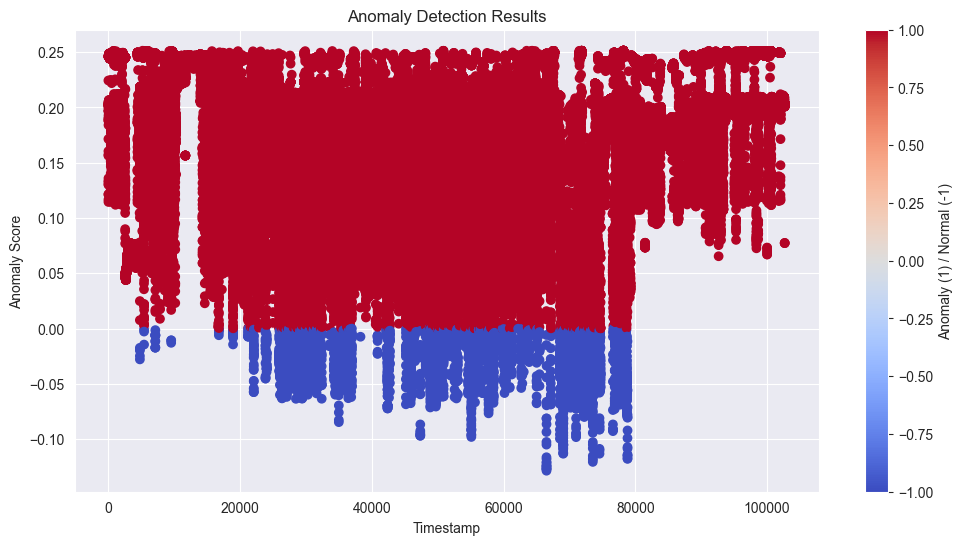

Identified Anomalies:
            DateTime  Filter#1_CTRL_FRC  Filter#1_CTRL_PRC  \
66506    2/8/23 0:34           762.9139           22.95002   
66507    2/8/23 0:35           800.0000           23.89684   
66508    2/8/23 0:39           793.9715           25.99335   
66509    2/8/23 0:59           754.6888           39.65449   
66510    2/8/23 1:07           739.5851           44.90704   
66511    2/8/23 1:10           733.5242           44.29660   
66512    2/8/23 1:10           732.1305           44.15624   
66513    2/8/23 1:11           730.4775           43.98975   
66514    2/8/23 1:14           724.3842           43.37605   
66515    2/8/23 1:17           718.3232           42.76561   
66516    2/8/23 1:25           703.1871           41.24115   
66517    2/8/23 1:28           698.7144           40.79067   
66518    2/8/23 1:33           687.9213           39.70363   
66519    2/8/23 1:39           676.0588           38.50887   
69047   2/13/23 6:01           789.5839         

<Figure size 640x480 with 0 Axes>

In [18]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Load your dataset (replace 'data.csv' with your data file)
df = pd.read_csv('/Users/saikiranpennam/Documents/RA/Western_Sugar_AI_Assessment_Working/2023/Data/Book1.csv')

# Select the three features of interest
selected_features = ['Filter#1_Inlet_Flow', 'Filter#1_Inlet_Pressure', 'Filter#1_Turbidity']
data = df[selected_features]

# Data Preprocessing
# Handle missing values if needed (e.g., fill with median or mean)
data = data.fillna(data.median())

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

# Choose the anomaly detection model (Isolation Forest)
model = IsolationForest(contamination=0.05, random_state=0)  # Adjust the contamination parameter as needed

# Train the model
model.fit(data_normalized)

# Detect anomalies
anomaly_scores = model.decision_function(data_normalized)
is_anomaly = model.predict(data_normalized)

# Visualize the anomalies
plt.figure(figsize=(12, 6))
plt.scatter(df.index, anomaly_scores, c=is_anomaly, cmap='coolwarm')
plt.title('Anomaly Detection Results')
plt.xlabel('Timestamp')
plt.ylabel('Anomaly Score')
plt.colorbar(label='Anomaly (1) / Normal (-1)')
plt.show()

# plt.savefig('Anomaly_Detection_Filters_Data.png')
# Threshold selection (you can adjust the threshold)
threshold = -0.1  # Adjust the threshold as needed

# Identify anomalies based on the threshold
anomalies = df[anomaly_scores < threshold]

# Display or save the identified anomalies
print("Identified Anomalies:")
print(anomalies)
anomalies.to_csv('anomalies.csv')  # Save anomalies to a CSV file if needed

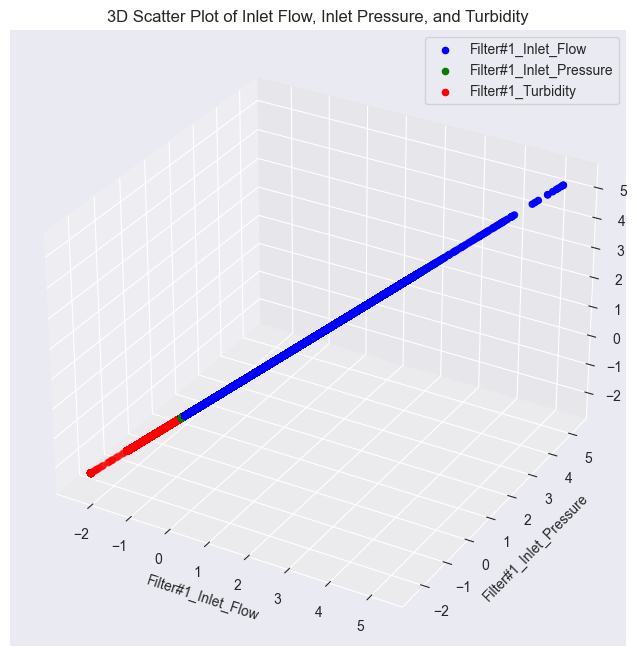

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Normalize the data for consistent scaling
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df[selected_features])

# Define colors for each feature
colors = ['b', 'g', 'r']

# Plot each feature with a unique color
for i, feature in enumerate(selected_features):
    ax.scatter(
        normalized_data[:, i],  # X-axis: normalized feature values
        normalized_data[:, i],  # Y-axis: normalized feature values
        normalized_data[:, i],  # Z-axis: normalized feature values
        c=colors[i],            # Use a unique color for each feature
        label=feature           # Label for the legend
    )

# Set axis labels
ax.set_xlabel(selected_features[0])
ax.set_ylabel(selected_features[1])
ax.set_zlabel(selected_features[2])

# Set plot title
plt.title('3D Scatter Plot of Inlet Flow, Inlet Pressure, and Turbidity')

# Add a legend
ax.legend()

# Show the plot
plt.show()

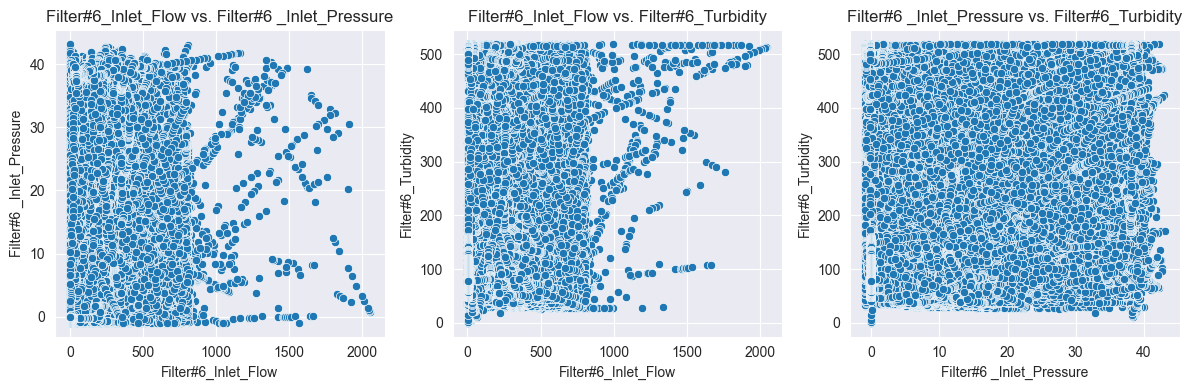

In [16]:
import seaborn as sns


selected_features = ['Filter#6_Inlet_Flow', 'Filter#6 _Inlet_Pressure', 'Filter#6_Turbidity']
# Create 2D scatter plots for each pair of features
plt.figure(figsize=(12, 4))

# Pair 1: Inlet Flow vs. Inlet Pressure
plt.subplot(1,3,1)
sns.scatterplot(x=selected_features[0], y=selected_features[1], data=df)
plt.title(f'{selected_features[0]} vs. {selected_features[1]}')

# Pair 2: Inlet Flow vs. Turbidity
plt.subplot(1,3,2)
sns.scatterplot(x=selected_features[0], y=selected_features[2], data=df)
plt.title(f'{selected_features[0]} vs. {selected_features[2]}')

# Pair 3: Inlet Pressure vs. Turbidity
plt.subplot(1,3,3)
sns.scatterplot(x=selected_features[1], y=selected_features[2], data=df)
plt.title(f'{selected_features[1]} vs. {selected_features[2]}')

# Adjust layout
plt.tight_layout()

plt.savefig('ScatterPlot_Filter#6.png', dpi=600)
# Show the plot
plt.show()